###Part 1 I will be using k-means clustering algorithm

In [1]:
import random
import math

def euclidean_distance(point1, point2):
    """Calculate Euclidean distance between two points."""
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

def mean_point(points):
    """Calculate the mean point of a list of points."""
    if not points:
        return []
    
    dim = len(points[0])
    return [
        sum(point[i] for point in points) / len(points)
        for i in range(dim)
    ]

def total_distance_to_centroids(point, centroids):
    """
    Calculate total distance from a point to all existing centroids.
    
    Args:
    point (list): Point to calculate distance from
    centroids (list): List of existing centroids
    
    Returns:
    float: Total distance to all centroids
    """
    return sum(
        euclidean_distance(point, centroid) 
        for centroid in centroids
    )



def kmeans(points, k, max_iters=100):
    """
    Perform K-means clustering with orphan centroid handling.
    
    Args:
    points (list): List of data points
    k (int): Number of clusters
    max_iters (int): Maximum number of iterations
    
    Returns:
    tuple: (centroids, labels, inertia)
    """
    # Validate inputs
    if not points or k <= 0:
        raise ValueError("Invalid input: points must be non-empty and k > 0")
    if len(set([len(i) for i in points])) > 1:
        raise ValueError("Invalid input: points dimension must be of equal length")
    
    # Randomly initialize centroids
    centroids = random.sample(points, k)
    #Iteration counter
    run = 1

    for i in range(max_iters):
        print('start iteration', run, 'with k=', k)
        # Store previous centroids to check for convergence
        prev_centroids = centroids.copy()
        
        # Assign points to clusters
        clusters = [[] for i in range(k)]
        #Label for all points 
        labels = []
        
        # Assign each point to nearest centroid
        for point in points:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_cluster_index = distances.index(min(distances))
            clusters[closest_cluster_index].append(point)
            labels.append(closest_cluster_index)
        

        """
        Sometimes a centroid will not have any point assigned to them 
        and is called orphan centroid , we will assign a point that is furtherst from 
        other centroid to the orphan and that point cant be the only point of another 
        centroid 
        """
        
        # Identify orphan centroid
        orphan_list = list(set(range(k)) - set(labels))
        
        #run loop until no orphan centroid is found
        while orphan_list != []:
            print(len(orphan_list), 'orphan centroid detected' )
            #treat one orphan at a time
            orphan_centroid = orphan_list[0]
            #find points that is the only point of a centroid
            unavailable_point = [i[0] for i in clusters if len(i) == 1 ]
            #find max dist point
            available_point = [point for point in points if point not in unavailable_point]
            dist_list = [total_distance_to_centroids(i,centroids) for i in available_point]
            candidate_point = available_point[dist_list.index(max(dist_list))]
            #assign candidte point to orphan centroid
            clusters[orphan_centroid].append(candidate_point)
            #update label of candidate point to orphan centroid
            labels[points.index(candidate_point)] = orphan_centroid
            #update orphan list 
            orphan_list = list(set(range(k)) - set(labels))

        
        # Recalculate centroids
        centroids = [
            mean_point(cluster) for cluster in clusters
        ]
        
        
        # Check for convergence
        if centroids == prev_centroids:
            break
        run = run +1

    # Calculate inertia
    inertia = sum(
        euclidean_distance(point, centroids[labels[points.index(point)]]) ** 2
        for point in points
    )
    return centroids, labels, inertia

###part 2

In [3]:
import pandas as pd
#import Tokyo listing data
url = 'https://data.insideairbnb.com/japan/kantō/tokyo/2024-06-29/data/listings.csv.gz'
#I cant import using the url directly somehow so I will download and import from my computer
df = pd.read_csv('/Users/tpminh/Downloads/listings.csv')
print(df.head())

        id                           listing_url       scrape_id last_scraped  \
0   197677   https://www.airbnb.com/rooms/197677  20240629155511   2024-06-30   
1   776070   https://www.airbnb.com/rooms/776070  20240629155511   2024-06-29   
2   905944   https://www.airbnb.com/rooms/905944  20240629155511   2024-06-30   
3  1016831  https://www.airbnb.com/rooms/1016831  20240629155511   2024-06-29   
4  1196177  https://www.airbnb.com/rooms/1196177  20240629155511   2024-06-29   

        source                                         name  \
0  city scrape                    Oshiage Holiday Apartment   
1  city scrape                       Kero-kero house room 1   
2  city scrape                 4F - Near Shinjuku & Shibuya   
3  city scrape   5 mins Shibuya Cat modern sunny  Shimokita   
4  city scrape  Stay with host Cozy private room Senju area   

                                         description  \
0                                                NaN   
1  We have been in air

/var/folders/np/yjbf57612_30_mjbr_d794yh0000gn/T/ipykernel_961/2059499840.py:5: DtypeWarning: Columns (59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/tpminh/Downloads/listings.csv')


In [4]:
#check columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
col = [
'price'
,'latitude'
,'longitude'
,'room_type'
]
#check null
[[ i,sum(df[i].isna())] for i in col]

[['price', 1713], ['latitude', 0], ['longitude', 0], ['room_type', 0]]

In [6]:
#remove obs with null price
df_2 = df[~df['price'].isna()][col]

In [7]:
#clean price variable 
df_2['price_num'] = df_2['price'].str.replace('$','').str.replace(',','').astype(float).astype(int)

In [8]:
df_2

,price,latitude,longitude,room_type,price_num
0,"$12,000.00",35.717070,139.826080,Entire home/apt,12000
1,"$9,652.00",35.738440,139.769170,Private room,9652
2,"$25,738.00",35.678780,139.678470,Entire home/apt,25738
3,"$23,286.00",35.658000,139.671340,Private room,23286
4,"$7,500.00",35.744731,139.797384,Private room,7500
...,...,...,...,...,...
16513,"$16,000.00",35.677552,139.683639,Entire home/apt,16000
16514,"$4,714.00",35.755566,139.708938,Entire home/apt,4714
16515,"$13,186.00",35.578456,139.737537,Entire home/apt,13186
16516,"$10,400.00",35.721761,139.814004,Entire home/apt,10400


In [9]:
#I will be using latitude and longtitde for clustering only 
#Convert df of lat and long to list of point
points = df_2[['latitude','longitude']].values.tolist()
#determine number of k by checking inertia 
random.seed(2024)
result_list = [[i, kmeans(points, i)] for i in range(1,16,1)]

start iteration 1 with k= 1
start iteration 2 with k= 1
start iteration 1 with k= 2
start iteration 2 with k= 2
start iteration 3 with k= 2
start iteration 4 with k= 2
start iteration 5 with k= 2
start iteration 6 with k= 2
start iteration 7 with k= 2
start iteration 8 with k= 2
start iteration 9 with k= 2
start iteration 10 with k= 2
start iteration 11 with k= 2
start iteration 12 with k= 2
start iteration 1 with k= 3
start iteration 2 with k= 3
start iteration 3 with k= 3
start iteration 4 with k= 3
start iteration 5 with k= 3
start iteration 6 with k= 3
start iteration 7 with k= 3
start iteration 8 with k= 3
start iteration 9 with k= 3
start iteration 10 with k= 3
start iteration 11 with k= 3
start iteration 12 with k= 3
start iteration 13 with k= 3
start iteration 14 with k= 3
start iteration 15 with k= 3
start iteration 1 with k= 4
start iteration 2 with k= 4
start iteration 3 with k= 4
start iteration 4 with k= 4
start iteration 5 with k= 4
start iteration 6 with k= 4
start itera

In [10]:
#check inertia 
inert = [(result[0], result[1][2]) for result in result_list]
inert

[(1, 104.22329876122116),
 (2, 58.796457759701845),
 (3, 45.26161952698786),
 (4, 25.914055143568838),
 (5, 21.28426700342924),
 (6, 17.878540790241253),
 (7, 16.072746829779064),
 (8, 15.061365140522497),
 (9, 12.057176695368904),
 (10, 11.77846465342544),
 (11, 10.724073712109156),
 (12, 9.570114945560453),
 (13, 8.461039939238818),
 (14, 8.87995269247798),
 (15, 6.77489432084706)]

In [11]:
#we can see that after k= 6, the inert does not change significantly 
#I will choose k = 5 or 6
#assign 2 new label columns to dataset
df_2['k5_label'] = result_list[4][1][1]
df_2['k6_label'] = result_list[5][1][1]
df_2

,price,latitude,longitude,room_type,price_num,k5_label,k6_label
0,"$12,000.00",35.717070,139.826080,Entire home/apt,12000,1,0
1,"$9,652.00",35.738440,139.769170,Private room,9652,1,4
2,"$25,738.00",35.678780,139.678470,Entire home/apt,25738,4,5
3,"$23,286.00",35.658000,139.671340,Private room,23286,4,5
4,"$7,500.00",35.744731,139.797384,Private room,7500,1,4
...,...,...,...,...,...,...,...
16513,"$16,000.00",35.677552,139.683639,Entire home/apt,16000,4,5
16514,"$4,714.00",35.755566,139.708938,Entire home/apt,4714,2,3
16515,"$13,186.00",35.578456,139.737537,Entire home/apt,13186,0,1
16516,"$10,400.00",35.721761,139.814004,Entire home/apt,10400,1,4


In [12]:
#k5 number of obs
df_2['k5_label'].value_counts()

k5_label
1    5508
4    4872
2    2965
0    1269
3     191
Name: count, dtype: int64

In [13]:
#k6 number of obs
df_2['k6_label'].value_counts()

k6_label
3    5302
4    4479
5    2406
1    1227
0    1206
2     185
Name: count, dtype: int64

#looks pretty similar to me the results for k = 5 and 6

In [14]:
#k5 coordinate of centroid
result_list[4][1][0]

[[35.60257108020948, 139.72686026361953],
 [35.71269430604595, 139.8062078935442],
 [35.733650399311905, 139.7179734940503],
 [35.69801392426917, 139.37366857045308],
 [35.687454274806676, 139.68513783261403]]

In [15]:
# Rough location for 5 cluster
# [35.60257108020948, 139.72686026361953], Shinagawa, South Tokyo,
# [35.71269430604595, 139.8062078935442], Taito city, Sumida city, North East Tokyo
# [35.733650399311905, 139.7179734940503], Toshima city, North West Tokyo
# [35.69801392426917, 139.37366857045308], Akishima, far west Tokyo, mountainous area
# [35.687454274806676, 139.68513783261403]], shibuya, shinjuku , West Tokyo, very popular tourist area 


In [16]:
#k6 coordinate of centroid
result_list[5][1][0]

[[35.7274063445063, 139.84599185988964],
 [35.6009384982733, 139.7264321804054],
 [35.697798130461685, 139.36882207003535],
 [35.71697479617614, 139.71052551513873],
 [35.70909292397327, 139.79361611396783],
 [35.676197190376854, 139.66479175910956]]

In [17]:

# Rough location for 6 cluster
# [35.7274063445063, 139.84599185988964] Katsushika, Nort East Tokyo 
# [35.6009384982733, 139.7264321804054] Shinagawa, South Tokyo
#  [35.697798130461685, 139.36882207003535 Akishima, far west Tokyo, mountainous area
# [35.71697479617614, 139.71052551513873] Toshima city, North West Tokyo
# [35.70909292397327, 139.79361611396783] Taito city, Sumida city, North East Tokyo
#  [35.676197190376854, 139.66479175910956] Shibuya, Shinjuku , West Tokyo, very popular tourist area 

#for me personally k = 5 is enough to capture the regions of tokyo. 6 would not be necessary

In [18]:
#save file to computer
df_2.to_csv('/Users/tpminh/Downloads/cluster_result_df.csv')

###part 3

In [19]:
#import data 
df_3 = pd.read_csv('/Users/tpminh/Downloads/cluster_result_df.csv')

In [20]:
df_3

,Unnamed: 0,price,latitude,longitude,room_type,price_num,k5_label,k6_label
0,0,"$12,000.00",35.717070,139.826080,Entire home/apt,12000,1,0
1,1,"$9,652.00",35.738440,139.769170,Private room,9652,1,4
2,2,"$25,738.00",35.678780,139.678470,Entire home/apt,25738,4,5
3,3,"$23,286.00",35.658000,139.671340,Private room,23286,4,5
4,4,"$7,500.00",35.744731,139.797384,Private room,7500,1,4
...,...,...,...,...,...,...,...,...
14800,16513,"$16,000.00",35.677552,139.683639,Entire home/apt,16000,4,5
14801,16514,"$4,714.00",35.755566,139.708938,Entire home/apt,4714,2,3
14802,16515,"$13,186.00",35.578456,139.737537,Entire home/apt,13186,0,1
14803,16516,"$10,400.00",35.721761,139.814004,Entire home/apt,10400,1,4


In [21]:
#median and mean prices by cluster
price_by_cluster = df_3[['price_num','k5_label' ]].groupby('k5_label').agg({'price_num': ['mean','median']})
price_by_cluster

price_num         
                  mean   median
k5_label                       
0         19254.431836  14604.0
1         21125.648511  14944.0
2         17572.977740  12750.0
3         12429.727749   6900.0
4         22787.959770  16714.0

we can see big difference between mean and median. Most expensive area are cluster 4 of Shibuya and Shinjuku which makes sense. Mountainous area in the far west are pretty inexpensive

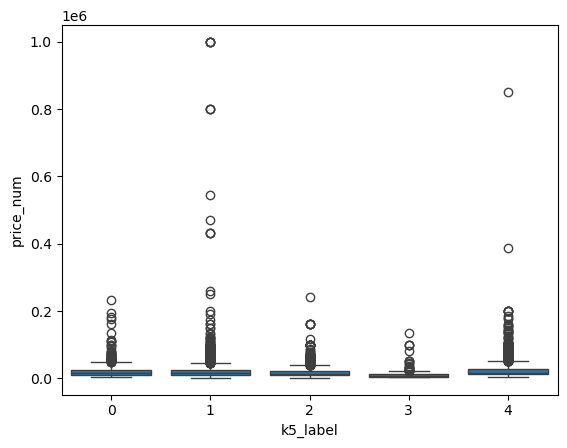

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
#lets analyse the price further, 
sns.boxplot(data = df_3, x = 'k5_label', y = 'price_num'  )
plt.show()

In [23]:
#lots of outliers, I would like to exclude anthing above USD100k
print( df_3[df_3['price_num'] < 100000]['k5_label'].value_counts())
#comparision to full data we do not lose much data points
print( df_3['k5_label'].value_counts())
#total points lost (about 1% of the total number of obs, we can say that we remove the top 99 percentile)
print(len(df_3[df_3['price_num'] >= 100000]))

k5_label
1    5459
4    4802
2    2944
0    1257
3     190
Name: count, dtype: int64
k5_label
1    5508
4    4872
2    2965
0    1269
3     191
Name: count, dtype: int64
153


In [24]:
#recalculate the mean and median we see them get closer a little bit
df_3_no_outliers = df_3[df_3['price_num'] < 100000]
price_by_cluster_no_outliers = df_3_no_outliers[['price_num','k5_label' ]].groupby(
    'k5_label'
).agg(
    {'price_num': ['mean','median']})
price_by_cluster_no_outliers

price_num         
                  mean   median
k5_label                       
0         18069.435959  14478.0
1         18858.025829  14857.0
2         16829.976223  12707.0
3         11780.863158   6885.5
4         21125.322782  16533.0

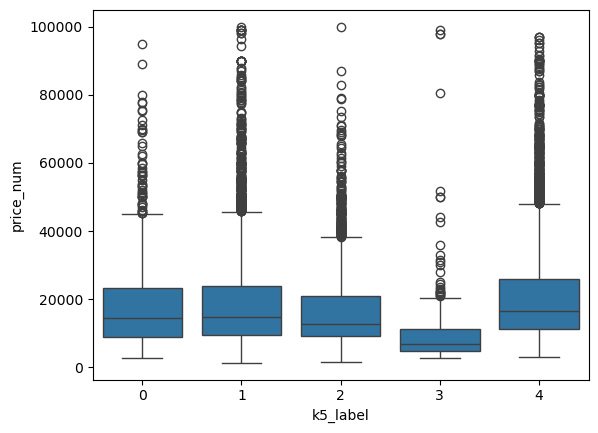

In [25]:
#replot the distribution. We can see things clearer now. 
#cluster 3 consistently have lower prices
#cluster 4 is slightly more expensive than 0 and 1

sns.boxplot(data = df_3_no_outliers, x = 'k5_label', y = 'price_num'  )
plt.show()

In [26]:
#analyse by roomtype and price at the same time
df_3_agg_sum = df_3_no_outliers[['k5_label', 'price_num', 'room_type']].groupby(
    ['k5_label', 'room_type']
).agg(
    median_price=('price_num', 'median'),
    mean_price=('price_num', 'mean'),
    count=('price_num', 'count')
)

# Calculate the total count for each `k5_label`
total_count_per_k5_label = df_3_agg_sum.groupby(level=0)['count'].transform('sum')

# Add a new column for the percentage of each group within its `k5_label`
df_3_agg_sum['percentage_of_group'] = (df_3_agg_sum['count'] / total_count_per_k5_label) * 100
df_3_agg_sum
#we can see that there are no hotel rooms in the mountainous area 3 (could be due to we remove outliers)
#Other than cluster 3, roughly 80% of place for rent are for entire home/apt, 10-20% are private room, share room and 
#hotel room only take a tiny portion 
#Cluser 3 have entire place and private room roughly take half the listing each
#entire place are generally the most expensive options regardless of cluster
#shared room are generally the least expensive except for cluster 0 (south tokyo) where hotel are super cheap 
#cluster 1,2,4 (north , north east, shibuya and shinjuku area) hotel and private room are equally priced if we look at mean


median_price    mean_price  count  \
k5_label room_type                                            
0        Entire home/apt       15186.5  18708.337711   1066   
         Hotel room             4143.0   4057.250000      4   
         Private room          10214.5  14791.691860    172   
         Shared room            6143.0  13986.200000     15   
1        Entire home/apt       16343.0  20677.668602   4134   
         Hotel room            11014.0  14014.837209     43   
         Private room          11936.0  15287.380999   1021   
         Shared room            3466.0   4802.402299    261   
2        Entire home/apt       13500.0  17701.591088   2536   
         Hotel room            10000.0   8020.400000      5   
         Private room           8631.0  11836.116580    386   
         Shared room            1600.0   2786.588235     17   
3        Entire home/apt        8000.0  15182.250000    100   
         Private room           5357.0   8343.860759     79   
         Shared room            4337.0   5543.090909     11   
4        Entire home/apt       17578.0  22220.427603   4130   
         Hotel room            15357.0  14525.941176     34   
         Private room          11300.0  15126.921233    584   
         Shared room            5262.0   6396.851852     54   

                          percentage_of_group  
k5_label room_type                             
0        Entire home/apt            84.805091  
         Hotel room                  0.318218  
         Private room               13.683373  
         Shared room                 1.193317  
1        Entire home/apt            75.728155  
         Hotel room                  0.787690  
         Private room               18.703059  
         Shared room                 4.781095  
2        Entire home/apt            86.141304  
         Hotel room                  0.169837  
         Private room               13.111413  
         Shared room                 0.577446  
3        Entire home/apt            52.631579  
         Private room               41.578947  
         Shared room                 5.789474  
4        Entire home/apt            86.005831  
         Hotel room                  0.708038  
         Private room               12.161599  
         Shared room                 1.124531

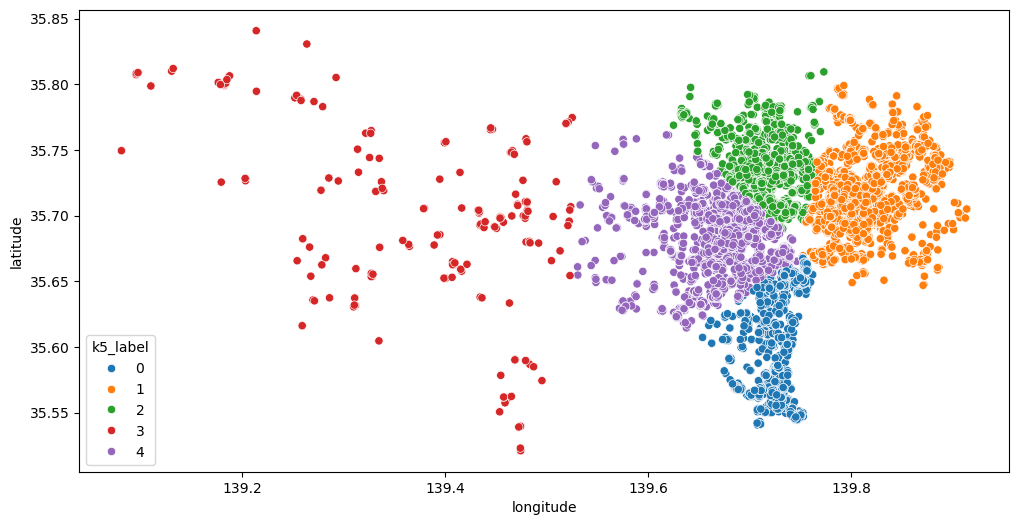

In [27]:
#plot the cluster based on long lat
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_3, x= 'longitude', y = 'latitude', hue= 'k5_label',legend='full', palette = 'tab10')
plt.show()